#EE511_HW1
#Anudeep Deekonda, USC ID: 2808183733

## Part A

In [1]:
import numpy as np
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import Dataset

In [2]:
# loading the dataset using Pandas
data1 = pd.read_csv('dataset1_train.csv')
data2 = pd.read_csv('dataset1_test.csv')
data3 = pd.read_csv('dataset2_train.csv')
data4 = pd.read_csv('dataset2_test.csv')
data5 = pd.read_csv('dataset3_train.csv')
data6 = pd.read_csv('dataset3_test.csv')


In [3]:
# preprocessing the data and extracting all the rows and columns except the last column for the input features
# for the output label we extract the last column 
# we convert both to numpy using the .values method

x1 = data1.iloc[:,0:2].values
y1 = data1.iloc[:,2].values

x2 = data2.iloc[:,0:2].values
y2 = data2.iloc[:,2].values

x3 = data3.iloc[:,0:2].values
y3 = data3.iloc[:,2].values

x4 = data4.iloc[:,0:2].values
y4 = data4.iloc[:,2].values

x5 = data5.iloc[:,0:2].values
y5 = data5.iloc[:,2].values

x6 = data6.iloc[:,0:2].values
y6 = data6.iloc[:,2].values


In [4]:
y1 = y1.reshape(-1,1)
y2 = y2.reshape(-1,1)
y3 = y3.reshape(-1,1)
y4 = y4.reshape(-1,1)
y5 = y5.reshape(-1,1)
y6 = y6.reshape(-1,1)

In [5]:
#Normalizing the output labels {0,1}
min_max = MinMaxScaler()
y1 = min_max.fit_transform(y1)
y2 = min_max.fit_transform(y2)
y3 = min_max.fit_transform(y3)
y4 = min_max.fit_transform(y4)
y5 = min_max.fit_transform(y5)
y6 = min_max.fit_transform(y6)

In [6]:
#converting the numpy arrays to pytorch tensors
x1 = torch.tensor(x1)
y1 = torch.tensor(y1)

x2 = torch.tensor(x2)
y2 = torch.tensor(y2)

x3 = torch.tensor(x3)
y3 = torch.tensor(y3)

x4 = torch.tensor(x4)
y4 = torch.tensor(y4)

x5 = torch.tensor(x5)
y5 = torch.tensor(y5)

x6 = torch.tensor(x6)
y6 = torch.tensor(y6)

In [7]:
class Dataset(Dataset):
    def __init__(self, x,y):
        self.x = x
        self.y = y

    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return len(self.x)


In [8]:
dataset1 = Dataset(x1,y1)

dataset2 = Dataset(x2,y2)

dataset3 = Dataset(x3,y3)

dataset4 = Dataset(x4,y4)

dataset5 = Dataset(x5,y5)

dataset6 = Dataset(x6,y6)

In [9]:
#len(dataset2)

In [10]:
#loading data into dataloader for batch processing 

train_loader1 = torch.utils.data.DataLoader(dataset = dataset1, batch_size = 25, shuffle = True)

test_loader1 = torch.utils.data.DataLoader(dataset = dataset2, batch_size = 25, shuffle = True)


train_loader2 = torch.utils.data.DataLoader(dataset = dataset3, batch_size = 25, shuffle = True)

test_loader2 = torch.utils.data.DataLoader(dataset = dataset4, batch_size = 25, shuffle = True)

train_loader3 = torch.utils.data.DataLoader(dataset = dataset5, batch_size = 25, shuffle = True)

test_loader3 = torch.utils.data.DataLoader(dataset = dataset6, batch_size = 25, shuffle = True)


 # Part B
 Define a cross-entropy loss function that takes the true labels and the predicted probabilities, and returns the cross-entropy loss value

In [11]:
# Building the linear network
class Model(nn.Module):
    def __init__(self, input_features, output_features):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(input_features, output_features) # we have only one fully coneected layer
        # defining the sigmoid activation function
        self.sigmoid = nn.Sigmoid()


    def forward(self, x):
        out = self.fc1(x)
        out = self.sigmoid(out)
        return out
        
        
        
        

In [12]:
# Creating the network
net = Model(2,1)
# for Loss function we're using the binary cross entropy loss (BCE) 
criterion = torch.nn.BCELoss(reduction = 'mean')
# for optimization we're using SGD with momentum with a learning rate of 0.1
optimizer = torch.optim.SGD(net.parameters(), lr = 0.01, momentum = 0.9)



## Part C and Part D
Train the model using the flow discussed in the discussion session and outlined in this problem.
    
The accuracy for the training and test datasets has been mentioned in Part C, within the `for` loop of epoch

In [13]:
# Training the network

epochs = 100

for epoch in range(epochs):
    for inputs, labels in train_loader1:
        inputs = inputs.float()
        labels = labels.float()
        # forward propagation
        outputs = net.forward(inputs)
        # loss calculation 
        loss = criterion(outputs, labels)
        # clearing gradient buffer to not accumulate gradients 
        optimizer.zero_grad()
        # calculating backward propagation
        loss.backward()
        # updating weights
        optimizer.step()
    

    # Accuracy calculation
    output1 = (outputs >= 0.5).float()
    accuracy = (output1 == labels).float().mean()

    #printing epoch results
    #print("Epoch {}/{}, Loss: {:.3f}, Accuracy: {:.3f}".format(epoch+1, epochs, loss, accuracy))

print("Epoch {}/{}, Loss: {:.3f}, Accuracy: {:.3f}".format(epoch+1, epochs, loss, accuracy))
    


Epoch 100/100, Loss: 0.060, Accuracy: 1.000


In [14]:
# testing the linear regression network with another dataset
epochs = 100

for epoch in range(epochs):
    for inputs, labels in test_loader1:
        inputs = inputs.float()
        labels = labels.float()
        # forward propagation
        outputs = net.forward(inputs)
        # loss calculation 
        loss = criterion(outputs, labels)
        # clearing gradient buffer to not accumulate gradients 
        #optimizer.zero_grad()
        # calculating backward propagation
        #loss.backward()
        # updating weights
        #optimizer.step()


    # Accuracy calculation
    output2 = (outputs >= 0.5).float()
    accuracy = (output2 == labels).float().mean()

    #printing epoch results
    #print("Epoch {}/{}, Loss: {:.3f}, Accuracy: {:.3f}".format(epoch+1, epochs, loss, accuracy))

print("Epoch {}/{}, Loss: {:.3f}, Accuracy: {:.3f}".format(epoch+1, epochs, loss, accuracy))
    

Epoch 100/100, Loss: 0.057, Accuracy: 1.000


<function matplotlib.pyplot.show(close=None, block=None)>

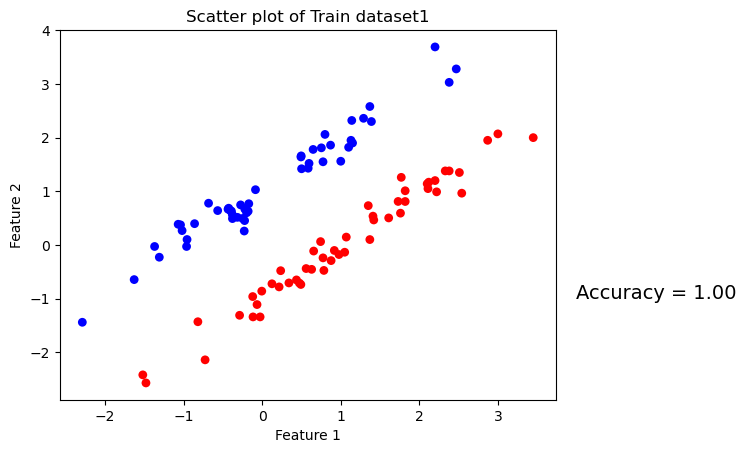

In [16]:
max_value, prediction = torch.max(output1,1)
predicted_y = prediction.data.numpy()
target_y = y1.data.numpy()

features = x1.data.numpy()

colors = ['red' if feature[0] > feature[1] else 'blue' for feature in features]


plt.scatter(features[:, 0], features[:, 1], s = 40, c = colors, lw = 0)
plt.text(4,-1, 'Accuracy = {:.2f}'.format(accuracy), fontdict = {'size' : 14})
plt.title('Scatter plot of Train dataset1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

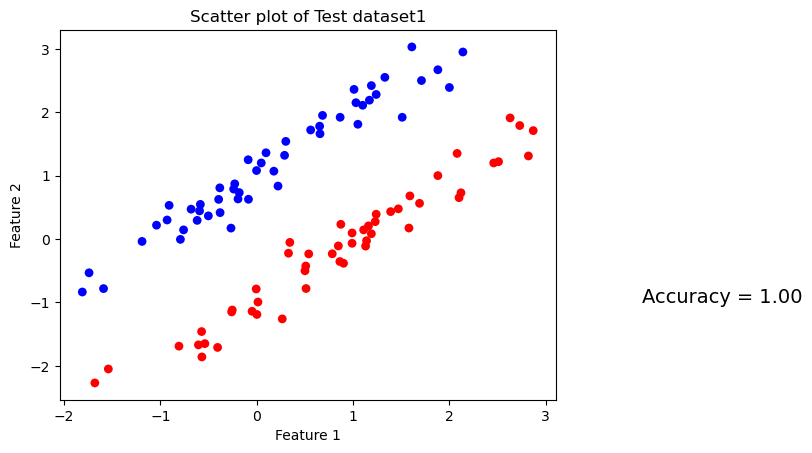

In [17]:

# matplotlib expects a numpy array so we need to convert the data, predicted output and target output from torch tensors back to numpy arrays

max_value, prediction = torch.max(output2,1)
predicted_y = prediction.data.numpy()
target_y = y2.data.numpy()

features = x2.data.numpy()

colors = ['red' if feature[0] > feature[1] else 'blue' for feature in features]


plt.scatter(features[:, 0], features[:, 1], s = 40, c = colors, lw = 0)
plt.text(4,-1, 'Accuracy = {:.2f}'.format(accuracy), fontdict = {'size' : 14})
plt.title('Scatter plot of Test dataset1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show


In [18]:
epochs = 100

for epoch in range(epochs):
    for inputs, labels in train_loader2:
        inputs = inputs.float()
        labels = labels.float()
        # forward propagation
        outputs = net.forward(inputs)
        # loss calculation 
        loss = criterion(outputs, labels)
        # clearing gradient buffer to not accumulate gradients 
        optimizer.zero_grad()
        # calculating backward propagation
        loss.backward()
        # updating weights
        optimizer.step()
    

    # Accuracy calculation
    output3 = (outputs >= 0.5).float()
    accuracy = (output3 == labels).float().mean()

    #printing epoch results
    #print("Epoch {}/{}, Loss: {:.3f}, Accuracy: {:.3f}".format(epoch+1, epochs, loss, accuracy))

print("Epoch {}/{}, Loss: {:.3f}, Accuracy: {:.3f}".format(epoch+1, epochs, loss, accuracy))
    


Epoch 100/100, Loss: 0.068, Accuracy: 1.000


In [19]:
# testing the linear regression network with another dataset
epochs = 100

for epoch in range(epochs):
    for inputs, labels in test_loader2:
        inputs = inputs.float()
        labels = labels.float()
        # forward propagation
        outputs = net.forward(inputs)
        # loss calculation 
        loss = criterion(outputs, labels)
        # clearing gradient buffer to not accumulate gradients 
        #optimizer.zero_grad()
        # calculating backward propagation
        #loss.backward()
        # updating weights
        #optimizer.step()


    # Accuracy calculation
    output4 = (outputs >= 0.5).float()
    accuracy = (output4 == labels).float().mean()

    #printing epoch results
    #print("Epoch {}/{}, Loss: {:.3f}, Accuracy: {:.3f}".format(epoch+1, epochs, loss, accuracy))

print("Epoch {}/{}, Loss: {:.3f}, Accuracy: {:.3f}".format(epoch+1, epochs, loss, accuracy))
    

Epoch 100/100, Loss: 0.148, Accuracy: 0.960


<function matplotlib.pyplot.show(close=None, block=None)>

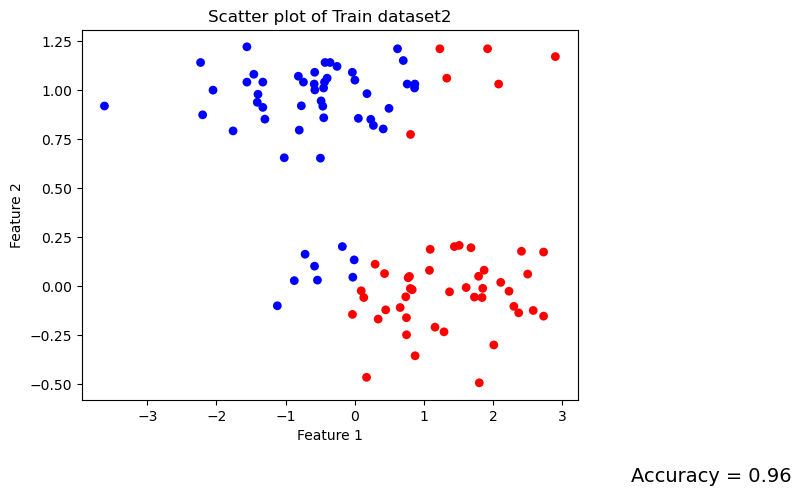

In [20]:
max_value, prediction = torch.max(output3,1)
predicted_y = prediction.data.numpy()
target_y = y3.data.numpy()

features = x3.data.numpy()

colors = ['red' if feature[0] > feature[1] else 'blue' for feature in features]


plt.scatter(features[:, 0], features[:, 1], s = 40, c = colors, lw = 0)
plt.text(4,-1, 'Accuracy = {:.2f}'.format(accuracy), fontdict = {'size' : 14})
plt.title('Scatter plot of Train dataset2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

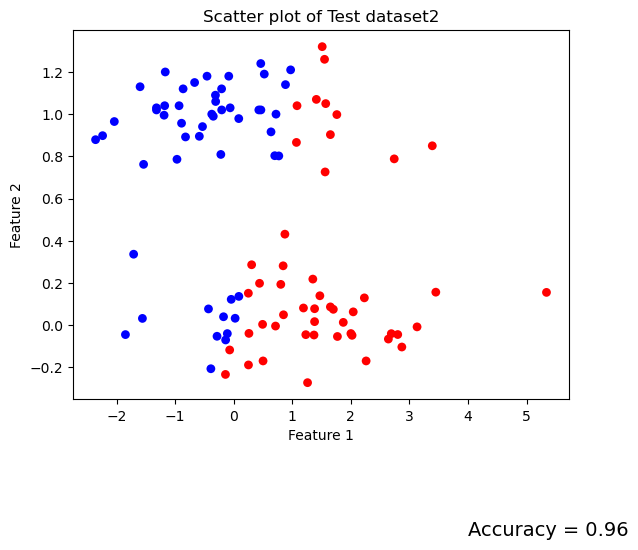

In [22]:

# matplotlib expects a numpy array so we need to convert the data, predicted output and target output from torch tensors back to numpy arrays

max_value, prediction = torch.max(output4,1)
predicted_y = prediction.data.numpy()
target_y = y4.data.numpy()

features = x4.data.numpy()

colors = ['red' if feature[0] > feature[1] else 'blue' for feature in features]


plt.scatter(features[:, 0], features[:, 1], s = 40, c = colors, lw = 0)
plt.text(4,-1, 'Accuracy = {:.2f}'.format(accuracy), fontdict = {'size' : 14})
plt.title('Scatter plot of Test dataset2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show


In [23]:
# Training the network

epochs = 100

for epoch in range(epochs):
    for inputs, labels in train_loader3:
        inputs = inputs.float()
        labels = labels.float()
        # forward propagation
        outputs = net.forward(inputs)
        # loss calculation 
        loss = criterion(outputs, labels)
        # clearing gradient buffer to not accumulate gradients 
        optimizer.zero_grad()
        # calculating backward propagation
        loss.backward()
        # updating weights
        optimizer.step()
    

    # Accuracy calculation
    output5 = (outputs >= 0.5).float()
    accuracy = (output5 == labels).float().mean()

    #printing epoch results
    #print("Epoch {}/{}, Loss: {:.3f}, Accuracy: {:.3f}".format(epoch+1, epochs, loss, accuracy))

print("Epoch {}/{}, Loss: {:.3f}, Accuracy: {:.3f}".format(epoch+1, epochs, loss, accuracy))
    


Epoch 100/100, Loss: 0.636, Accuracy: 0.800


In [24]:
# testing the linear regression network with another dataset
epochs = 100

for epoch in range(epochs):
    for inputs, labels in test_loader3:
        inputs = inputs.float()
        labels = labels.float()
        # forward propagation
        outputs = net.forward(inputs)
        # loss calculation 
        loss = criterion(outputs, labels)
        # clearing gradient buffer to not accumulate gradients 
        #optimizer.zero_grad()
        # calculating backward propagation
        #loss.backward()
        # updating weights
        #optimizer.step()


    # Accuracy calculation
    output6 = (outputs >= 0.5).float()
    accuracy = (output6 == labels).float().mean()

    #printing epoch results
    #print("Epoch {}/{}, Loss: {:.3f}, Accuracy: {:.3f}".format(epoch+1, epochs, loss, accuracy))

print("Epoch {}/{}, Loss: {:.3f}, Accuracy: {:.3f}".format(epoch+1, epochs, loss, accuracy))
    

Epoch 100/100, Loss: 0.684, Accuracy: 0.720


<function matplotlib.pyplot.show(close=None, block=None)>

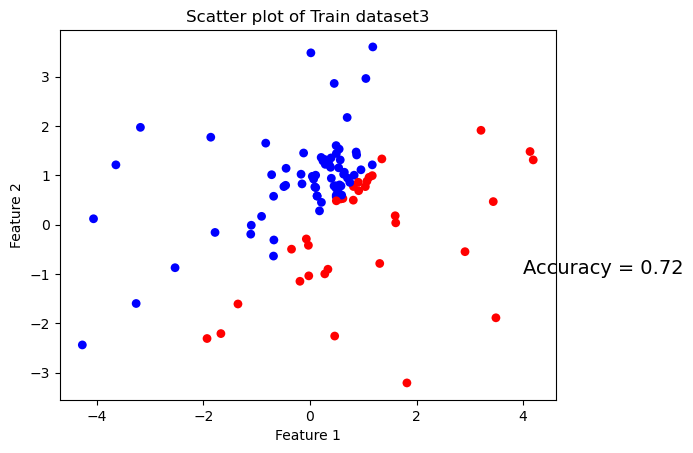

In [25]:
max_value, prediction = torch.max(output5,1)
predicted_y = prediction.data.numpy()
target_y = y5.data.numpy()

features = x5.data.numpy()

colors = ['red' if feature[0] > feature[1] else 'blue' for feature in features]


plt.scatter(features[:, 0], features[:, 1], s = 40, c = colors, lw = 0)
plt.text(4,-1, 'Accuracy = {:.2f}'.format(accuracy), fontdict = {'size' : 14})
plt.title('Scatter plot of Train dataset3')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

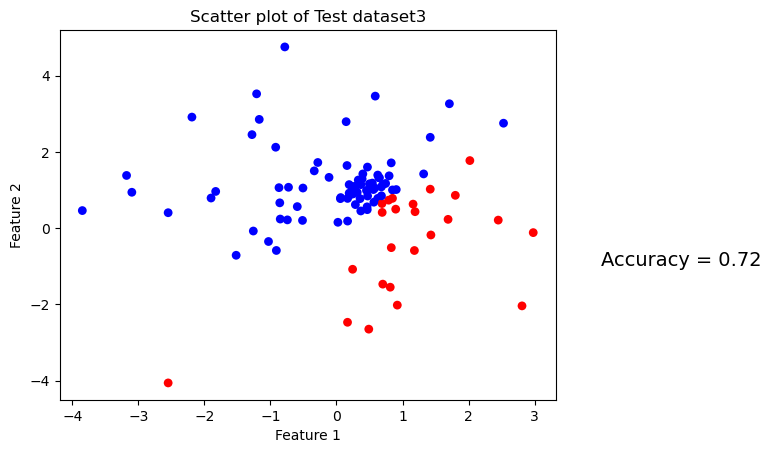

In [26]:

# matplotlib expects a numpy array so we need to convert the data, predicted output and target output from torch tensors back to numpy arrays

max_value, prediction = torch.max(output6,1)
predicted_y = prediction.data.numpy()
target_y = y6.data.numpy()

features = x6.data.numpy()

colors = ['red' if feature[0] > feature[1] else 'blue' for feature in features]


plt.scatter(features[:, 0], features[:, 1], s = 40, c = colors, lw = 0)
plt.text(4,-1, 'Accuracy = {:.2f}'.format(accuracy), fontdict = {'size' : 14})
plt.title('Scatter plot of Test dataset3')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show
